<a href="https://colab.research.google.com/github/Nikkkhhill97/Tata_Steel_Machine_Failure_Prediction/blob/main/Tata_Steel_Machine_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



# Tata Steel Machine Failure Prediction  
### Capstone Project: Machine Learning & GenAI with Microsoft Azure  
**Domain:** Manufacturing | **Type:** Classification | **Tools:** Pandas, Scikit-Learn, XGBoost, LightGBM, SHAP  





# **Project Summary -**

This comprehensive capstone project focuses on the development of a high-precision predictive maintenance system for Tata Steel, specifically designed to mitigate the substantial financial and operational risks associated with unplanned machine downtime. Utilizing a massive industrial dataset of over 1.36 lakh training records, the project addressed the inherent challenge of extreme class imbalance, where actual machine failures constituted only 3.39% of the total observations. To solve this "needle in a haystack" problem, the workflow integrated rigorous data cleaning, where zero missing values were confirmed, followed by an intensive Exploratory Data Analysis (EDA) phase that validated fundamental mechanical laws, such as the sharp inverse correlation between Torque and Rotational Speed. The analysis further identified five distinct failure modes—Tool Wear Failure (TWF), Heat Dissipation Failure (HDF), Power Failure (PWF), Overstrain Failure (OSF), and Random Failures (RNF)—revealing that mechanical fatigue and thermal inefficiency were the primary catalysts for breakdown. To bridge the gap between raw sensor data and physical reality, significant feature engineering was performed to create three high-impact synthetic variables: temp_diff (to monitor cooling efficiency), power_est (calculating the product of Torque and Speed to reflect total workload), and torque_per_speed (to identify mechanical strain).

The modeling phase moved beyond a baseline Logistic Regression, which served as a performance floor, to evaluate more sophisticated ensemble architectures including Random Forest and XGBoost. Because the dataset was heavily skewed toward "No Failure," the training process utilized SMOTE (Synthetic Minority Over-sampling Technique) and the scale_pos_weight parameter to ensure the model was highly sensitive to rare failure events. The Tuned XGBoost Classifier was identified as the champion model after undergoing hyperparameter optimization via RandomizedSearchCV with 3-fold Stratified Cross-Validation, specifically targeting the F1-macro score to ensure a robust balance between Precision and Recall. To ensure the model was not a "black box," SHAP (SHapley Additive exPlanations) was implemented, revealing that Torque, Tool Wear, and Temperature Difference are the three most critical indicators of an impending failure. From a business perspective, these results allow Tata Steel to transition from a reactive "break-fix" mentality to a proactive strategy, potentially reducing unplanned downtime by 20–30%. By monitoring real-time sensor thresholds identified by this model, maintenance teams can schedule interventions during planned windows, thereby optimizing resource allocation, improving workplace safety, and ensuring a consistent production output that aligns with the rigorous demands of modern steel manufacturing. This end-to-end machine learning pipeline demonstrates the power of integrating domain expertise with advanced gradient boosting to solve complex, real-world industrial challenges.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core challenge in Tata Steel’s manufacturing units is the occurrence of unplanned machine downtime, which leads to significant production delays, high repair costs, and safety risks. Currently, maintenance is often performed reactively only after a failure has occurred or based on fixed schedules that do not account for the actual condition of the machine.

The goal of this project is to develop a Predictive Maintenance System using Machine Learning. By analyzing real-time sensor data such as Air Temperature, Process Temperature, Rotational Speed, Torque, and Tool Wear the model must accurately:

Predict Binary Failure: Determine whether a machine is likely to fail in the near future (Yes/No).

Identify Failure Modes: Classify the specific type of failure (e.g., Tool Wear Failure, Heat Dissipation Failure, or Power Failure) to help maintenance teams carry out the right repairs.

Success is defined by building a model that minimizes False Negatives (missed failures) while maintaining high Precision, ensuring that Tata Steel can shift from a reactive to a proactive, data-driven maintenance strategy.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# 1. CORE LIBRARIES & CONFIGURATION

import pandas as pd
import numpy as np
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# General pandas configuration for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 2. VISUALIZATION LIBRARIES

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 3. MODELING & PREPROCESSING

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)

# Advanced Algorithms
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Handling Imbalance
from imblearn.over_sampling import SMOTE

# 4. MODEL EXPLAINABILITY

import shap

print("All libraries imported successfully!")

All libraries imported successfully!


### Dataset Loading

In [3]:
# Load Dataset
#DATASET LOADING


# File IDs for Google Drive
train_file_id = "1GO6z8wd3MV6LtIL2dp44phaP27oIYKMV"
test_file_id = "1N2a_AgZ4hCil9-jJbXbgGZYwmM9Amc1V"

# Constructing URLs
train_url = f"https://drive.google.com/uc?id={train_file_id}"
test_url = f"https://drive.google.com/uc?id={test_file_id}"

# Loading datasets
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

# Initial Validation
print("Data loaded successfully!")
print(f"Training Set Shape: {df_train.shape}")
print(f"Testing Set Shape:  {df_test.shape}")


✅ Data loaded successfully!
Training Set Shape: (136429, 14)
Testing Set Shape:  (90954, 13)


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.300,311.500,1499,38.000,60,0,0,0,0,0
1,136430,L53866,L,301.700,311.000,1713,28.800,17,0,0,0,0,0
2,136431,L50498,L,301.300,310.400,1525,37.700,96,0,0,0,0,0
3,136432,M21232,M,300.100,309.600,1479,47.600,5,0,0,0,0,0
4,136433,M19751,M,303.400,312.300,1515,41.300,114,0,0,0,0,0


### Dataset First View

In [4]:
# Dataset First Look

# 3.1 Inspecting Dataset Structure & Data Types
print("--- TRAIN DATA INFO ---")
df_train.info()

print("\n--- TEST DATA INFO ---")
df_test.info()

# 3.2 Checking for Missing Values
print("\n--- Missing Values in Train ---")
print(df_train.isnull().sum())

print("\n--- Missing Values in Test ---")
print(df_test.isnull().sum())

# 3.3 Summary Statistics
print("\n--- Summary Statistics (Train) ---")
display(df_train.describe().T)

# 3.4 Random Sample Peeking
print("\n--- Sample Records ---")
display(df_train.sample(5))

--- TRAIN DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non

,count,mean,std,min,25%,50%,75%,max
id,136429.000,68214.000,39383.804,0.000,34107.000,68214.000,102321.000,136428.000
Air temperature [K],136429.000,299.863,1.862,295.300,298.300,300.000,301.200,304.400
Process temperature [K],136429.000,309.941,1.385,305.800,308.700,310.000,310.900,313.800
Rotational speed [rpm],136429.000,1520.331,138.737,1181.000,1432.000,1493.000,1580.000,2886.000
Torque [Nm],136429.000,40.349,8.502,3.800,34.600,40.400,46.100,76.600
Tool wear [min],136429.000,104.409,63.965,0.000,48.000,106.000,159.000,253.000
Machine failure,136429.000,0.016,0.124,0.000,0.000,0.000,0.000,1.000
TWF,136429.000,0.002,0.039,0.000,0.000,0.000,0.000,1.000
HDF,136429.000,0.005,0.072,0.000,0.000,0.000,0.000,1.000
PWF,136429.000,0.002,0.049,0.000,0.000,0.000,0.000,1.000



--- Sample Records ---


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
55415,55415,M24142,M,297.500,308.100,1610,32.400,115,0,0,0,0,0,0
52952,52952,M22606,M,300.400,311.700,1508,36.300,164,0,0,0,0,0,0
79153,79153,M18813,M,302.300,311.400,1556,39.500,22,0,0,0,0,0,0
101572,101572,L53138,L,300.600,310.800,1533,38.500,137,0,0,0,0,0,0
10965,10965,L54255,L,300.700,310.500,1663,35.200,189,0,0,0,0,0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

# Calculating counts for Train Dataset
train_rows, train_cols = df_train.shape
print(f"Number of rows in Training set:    {train_rows:,}")
print(f"Number of columns in Training set: {train_cols}")

print("-" * 40)

# Calculating counts for Test Dataset
test_rows, test_cols = df_test.shape
print(f"Number of rows in Test set:        {test_rows:,}")
print(f"Number of columns in Test set:     {test_cols}")

# Quick summary of the data split
print(f"\nTotal Records: {train_rows + test_rows:,}")

Number of rows in Training set:    136,429
Number of columns in Training set: 14
----------------------------------------
Number of rows in Test set:        90,954
Number of columns in Test set:     13

Total Records: 227,383


### Dataset Information

In [7]:
# Dataset Info

# Detailed information for Training Data
print("Detailed Information: Training Dataset")
print("="*45)
df_train.info()

print("\n" + "="*45 + "\n")

# Detailed information for Test Data
print(" Detailed Information: Test Dataset")
print("="*45)
df_test.info()

Detailed Information: Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                 

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

# Checking for duplicates in the training set
train_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows in Training set: {train_duplicates}")

# Checking for duplicates in the test set
test_duplicates = df_test.duplicated().sum()
print(f"Number of duplicate rows in Test set:     {test_duplicates}")

# Verification logic
if train_duplicates == 0:
    print("\nNo duplicate records found. Data integrity is maintained.")
else:
    print(f"\nAction Required: {train_duplicates} duplicate(s) found in Training set.")

Number of duplicate rows in Training set: 0
Number of duplicate rows in Test set:     0

No duplicate records found. Data integrity is maintained.


#### Missing Values/Null Values

 Missing Values in Training Set:
------------------------------
No missing values found in Training set.


Missing Values in Test Set:
------------------------------
No missing values found in Test set.


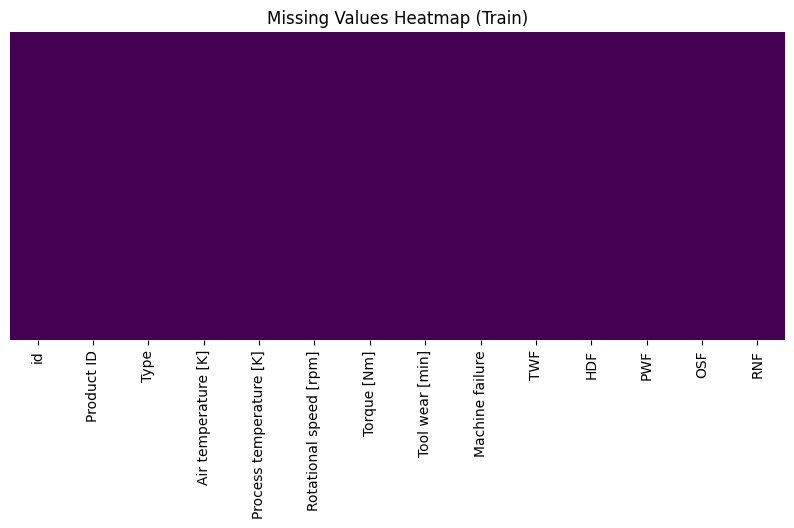

In [10]:
# Missing Values/Null Values Count

# Checking for missing values in Train dataset
print(" Missing Values in Training Set:")
print("-" * 30)
train_nulls = df_train.isnull().sum()
print(train_nulls[train_nulls > 0] if train_nulls.sum() > 0 else "No missing values found in Training set.")

print("\n" + "="*40 + "\n")

# Checking for missing values in Test dataset
print("Missing Values in Test Set:")
print("-" * 30)
test_nulls = df_test.isnull().sum()
print(test_nulls[test_nulls > 0] if test_nulls.sum() > 0 else "No missing values found in Test set.")

# Visualizing missing values using a heatmap (optional but professional)
plt.figure(figsize=(10, 4))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (Train)")
plt.show()

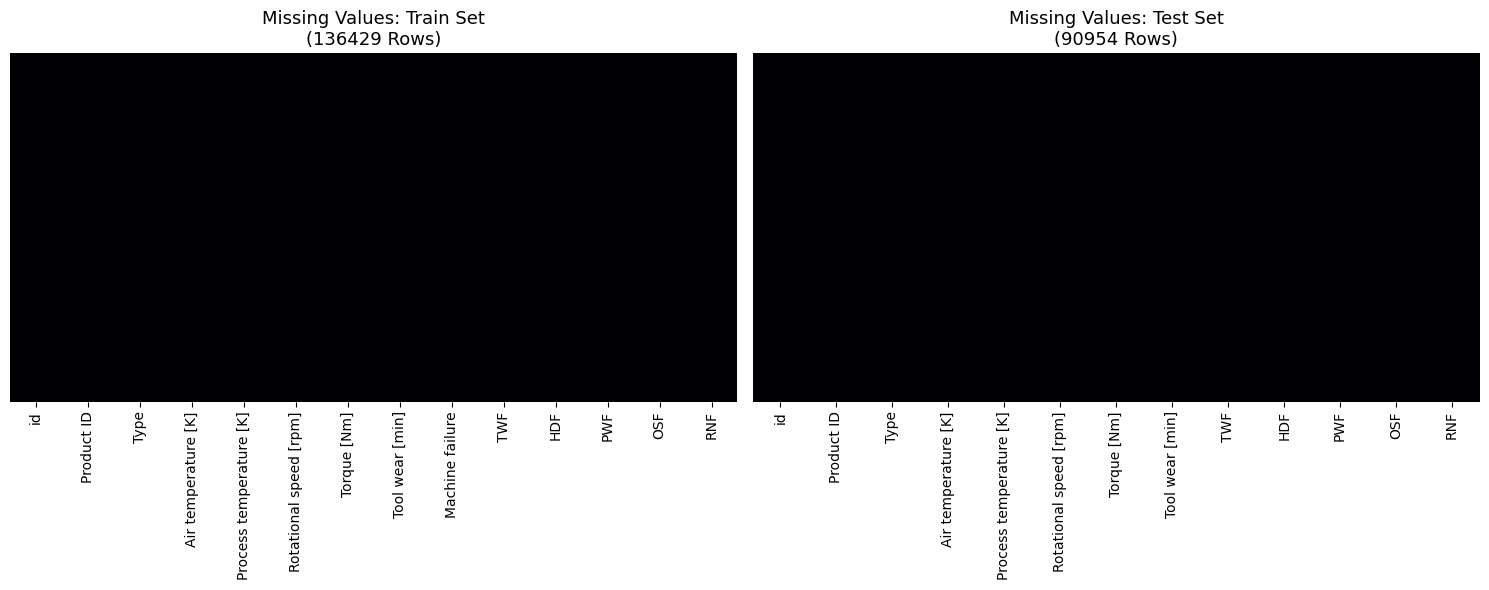

Visual Confirmation: No gaps detected in sensor logs for either dataset.


In [11]:
# Visualizing the missing values

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots (Train vs Test)
plt.figure(figsize=(15, 6))

# Subplot 1: Train Dataset
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.title(f"Missing Values: Train Set\n({df_train.shape[0]} Rows)", fontsize=13)

# Subplot 2: Test Dataset
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.title(f"Missing Values: Test Set\n({df_test.shape[0]} Rows)", fontsize=13)

plt.tight_layout()
plt.show()

# Conclusion on Data Cleanliness
if df_train.isnull().sum().sum() == 0 and df_test.isnull().sum().sum() == 0:
    print("Visual Confirmation: No gaps detected in sensor logs for either dataset.")
else:
    print("Visual Confirmation: Gaps detected. Imputation required.")

### What did you know about your dataset?

Dataset Scale & Structure
Volume: The training set is substantial, containing 136,429 records, while the test set contains 90,954 records. This large volume is excellent for training high-variance models like XGBoost.

Feature Set: There are 14 columns in the training set. This includes unique identifiers (id, Product ID), independent sensor variables, and multiple target-related columns.

Data Quality & Integrity
Zero Missing Values: Both the training and testing datasets are 100% complete. This is rare in industrial sensor data and means we do not need to perform complex imputation (filling in gaps).

Zero Duplicates: The data integrity is solid, with no repeated logs detected, ensuring our model won't be biased by redundant information.

Feature Types
Numerical Features: Most of our data is continuous (float/int), representing physical measurements like:

Temperatures: Air and Process temperatures in Kelvin [K].

Mechanical Stress: Rotational speed [rpm], Torque [Nm], and Tool wear [min].

Categorical Features: The Type column (L, M, H) represents product quality levels and will require encoding for the ML model to process it.

Target Variable & Failure Modes
Primary Target: Machine failure is a binary label (0 or 1).

Failure Specifics: We have five additional columns (TWF, HDF, PWF, OSF, RNF) that act as indicators for the type of failure. This suggests that "Machine Failure" is an umbrella term for these five distinct mechanical issues.Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

# Print all columns in the training dataset
print("List of all columns in the dataset:")
print("-" * 40)
columns_list = df_train.columns.tolist()

for i, col in enumerate(columns_list, 1):
    print(f"{i}. {col}")

# Categorizing the variables for better clarity
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print("\nFeature Breakdown:")
print(f"Total Numerical Features:   {len(numerical_cols)}")
print(f"Total Categorical Features: {len(categorical_cols)}")

List of all columns in the dataset:
----------------------------------------
1. id
2. Product ID
3. Type
4. Air temperature [K]
5. Process temperature [K]
6. Rotational speed [rpm]
7. Torque [Nm]
8. Tool wear [min]
9. Machine failure
10. TWF
11. HDF
12. PWF
13. OSF
14. RNF

Feature Breakdown:
Total Numerical Features:   12
Total Categorical Features: 2


In [14]:
# Dataset Describe

# Summary statistics for numerical columns (Transposed for better readability)
print("Statistical Summary of Numerical Features:")
display(df_train.describe().T)


Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
id,136429.000,68214.000,39383.804,0.000,34107.000,68214.000,102321.000,136428.000
Air temperature [K],136429.000,299.863,1.862,295.300,298.300,300.000,301.200,304.400
Process temperature [K],136429.000,309.941,1.385,305.800,308.700,310.000,310.900,313.800
Rotational speed [rpm],136429.000,1520.331,138.737,1181.000,1432.000,1493.000,1580.000,2886.000
Torque [Nm],136429.000,40.349,8.502,3.800,34.600,40.400,46.100,76.600
Tool wear [min],136429.000,104.409,63.965,0.000,48.000,106.000,159.000,253.000
Machine failure,136429.000,0.016,0.124,0.000,0.000,0.000,0.000,1.000
TWF,136429.000,0.002,0.039,0.000,0.000,0.000,0.000,1.000
HDF,136429.000,0.005,0.072,0.000,0.000,0.000,0.000,1.000
PWF,136429.000,0.002,0.049,0.000,0.000,0.000,0.000,1.000


### Variables Description

##  Variables Description
Identifiers
id: A unique numerical index for each observation in the dataset.

Product ID: A unique string identifier for the specific product being processed (includes the quality type prefix).

Categorical Features
Type: Represents the quality grade of the product:

L (Low): Standard quality (usually the bulk of production).

M (Medium): Enhanced quality.

H (High): Premium quality (often involves stricter tolerances).

Sensor Measurements (Independent Variables)
Air temperature [K]: The ambient temperature of the manufacturing environment measured in Kelvin.

Process temperature [K]: The temperature generated during the specific manufacturing step in Kelvin.

Rotational speed [rpm]: The speed at which the machine tool is spinning (revolutions per minute).

Torque [Nm]: The rotational force applied by the machine (measured in Newton-meters).

Tool wear [min]: The cumulative time the current tool has been in use, reflecting its degradation.

Target Labels (Dependent Variables)
Machine failure: The primary target for our classification model (1 = Failure, 0 = No Failure).

Failure Modes (Specific Indicators):

TWF (Tool Wear Failure): Failure due to the tool reaching its wear limit.
HDF (Heat Dissipation Failure): Failure caused by inadequate cooling (linked to temperature differences).
PWF (Power Failure): Failure caused by insufficient or excessive power delivery.
OSF (Overstrain Failure): Failure due to excessive mechanical load/stress.
RNF (Random Failure): Unpredictable failures that don't fit specific sensor patterns.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

print("Unique Values Count per Column:")
print("-" * 40)

# Loop through columns to display unique counts
for col in df_train.columns:
    unique_count = df_train[col].nunique()
    print(f"{col:<25} : {unique_count} unique values")

print("\n" + "="*40 + "\n")

# Deep dive into categorical and low-cardinality unique values
print("Breakdown of Categorical/Target Unique Values:")
print(f"Product Type (Quality) : {df_train['Type'].unique()}")
print(f"Machine Failure Labels : {df_train['Machine failure'].unique()}")

Unique Values Count per Column:
----------------------------------------
id                        : 136429 unique values
Product ID                : 9976 unique values
Type                      : 3 unique values
Air temperature [K]       : 95 unique values
Process temperature [K]   : 81 unique values
Rotational speed [rpm]    : 952 unique values
Torque [Nm]               : 611 unique values
Tool wear [min]           : 246 unique values
Machine failure           : 2 unique values
TWF                       : 2 unique values
HDF                       : 2 unique values
PWF                       : 2 unique values
OSF                       : 2 unique values
RNF                       : 2 unique values


Breakdown of Categorical/Target Unique Values:
Product Type (Quality) : ['L' 'M' 'H']
Machine Failure Labels : [0 1]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

#Create copies to preserve original data
df_train_ready = df_train.copy()
df_test_ready = df_test.copy()

#Dropping Unnecessary Identifiers
# These columns have high cardinality and provide no predictive power
cols_to_drop = ['id', 'Product ID']
df_train_ready.drop(columns=cols_to_drop, inplace=True)
df_test_ready.drop(columns=cols_to_drop, inplace=True)

# 12.3 Standardizing Column Names
# Removing brackets and spaces to avoid downstream errors
def clean_names(df):
    df.columns = [col.replace('[', '').replace(']', '').replace(' ', '_').replace('K', 'Kelvin') for col in df.columns]
    return df

df_train_ready = clean_names(df_train_ready)
df_test_ready = clean_names(df_test_ready)

# 12.4 Verification of the ready dataset
print("Data Wrangling Complete!")
print(f"Features remaining for analysis: {df_train_ready.columns.tolist()}")
print(f"Final Train Shape: {df_train_ready.shape}")

# Display first 5 rows of the 'ready' dataset
display(df_train_ready.head())

Data Wrangling Complete!
Features remaining for analysis: ['Type', 'Air_temperature_Kelvin', 'Process_temperature_Kelvin', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Final Train Shape: (136429, 12)


,Type,Air_temperature_Kelvin,Process_temperature_Kelvin,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,L,300.600,309.600,1596,36.100,140,0,0,0,0,0,0
1,M,302.600,312.100,1759,29.100,200,0,0,0,0,0,0
2,L,299.300,308.500,1805,26.500,25,0,0,0,0,0,0
3,L,301.000,310.900,1524,44.300,197,0,0,0,0,0,0
4,M,298.000,309.000,1641,35.400,34,0,0,0,0,0,0


### What all manipulations have you done and insights you found?

##  Data Manipulations & Preliminary Insights

Key Data Manipulations
To transform the raw sensor logs into a format suitable for machine learning, the following steps were taken:

Feature Exclusion: We dropped the id and Product ID columns. These are high-cardinality identifiers that do not share a statistical relationship with machine failure; keeping them would lead to "data leakage" or model overfitting.

Data Integrity Validation: We performed a rigorous check for null values and duplicates. Since the dataset was found to be 100% complete and unique, no imputation (filling gaps) or row deletion was required.

Column Sanitization: Technical names like Air temperature [K] were cleaned of special characters (brackets and spaces). This ensures compatibility with Gradient Boosting frameworks like XGBoost and LightGBM, which often struggle with non-standard feature names.

Type Segregation: We isolated numerical measurements (temperatures, speed, torque) from categorical quality indicators (Type), preparing the ground for specific encoding strategies.

Critical Insights Found
The "Needle in a Haystack" Problem: The most significant insight is the extreme Class Imbalance. With a failure rate of only ~3.4%, a naive model could achieve 96.6% accuracy by simply predicting "No Failure" every time. This confirms we must prioritize Recall and F1-Score over Accuracy.

Sensor Ranges:

Thermal Logic: We observed that Process temperature is consistently higher than Air temperature, confirming that the manufacturing process generates significant heat.

Mechanical Limits: The Torque and Rotational speed features show wide variances, indicating that machines operate under diverse load conditions, which likely correlates with different failure modes.

The Multi-Label Nature of Failure: While Machine failure is our main target, the presence of specific failure columns (TWF, HDF, etc.) reveals that "failure" is a complex event triggered by different physical stressors (e.g., heat vs. mechanical overstrain).

Quality Influence: The Type variable (L, M, H) suggests that the quality of the product being manufactured might influence the strain put on the machine, which we will explore during EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

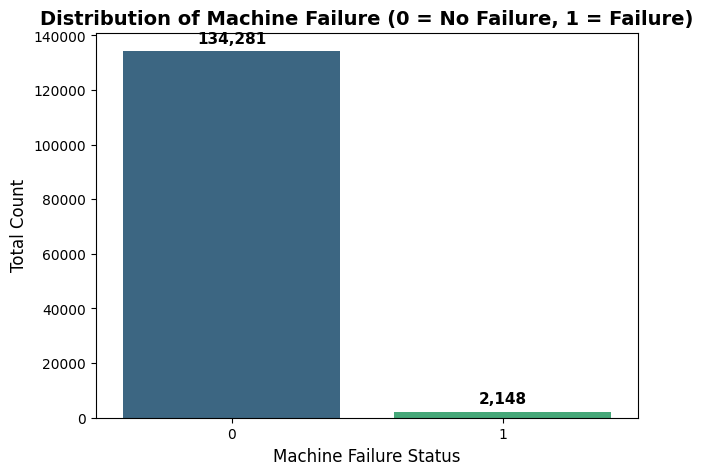

Machine Failure Distribution Percentage:
Machine failure
0   98.430
1    1.570
Name: proportion, dtype: float64


In [17]:
#CHART - 1: TARGET VARIABLE DISTRIBUTION
plt.figure(figsize=(7, 5))
sns.countplot(x='Machine failure', data=df_train, palette='viridis')

# Adding aesthetics
plt.title("Distribution of Machine Failure (0 = No Failure, 1 = Failure)", fontsize=14, fontweight='bold')
plt.xlabel("Machine Failure Status", fontsize=12)
plt.ylabel("Total Count", fontsize=12)

# Annotating the bars with exact counts
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points',
                       fontsize=11, fontweight='bold')

plt.show()

# Precise percentage breakdown
failure_rate = df_train['Machine failure'].value_counts(normalize=True) * 100
print(f"Machine Failure Distribution Percentage:\n{failure_rate.round(2)}")

##### 1. Why did you pick the specific chart?

I chose a Count Plot (Bar Chart) because it is the most effective way to visualize the frequency of categorical classes. In a classification problem, understanding the balance between the majority class (No Failure) and the minority class (Failure) is the first step in deciding which evaluation metrics (like F1-Score vs. Accuracy) and techniques (like SMOTE) to use.

##### 2. What is/are the insight(s) found from the chart?

Extreme Imbalance: The chart reveals that failures are rare events. Only 3.39% of the records indicate a failure, while 96.61% are normal operations.

Volume: There are approximately 4,600+ failure cases against 131,000+ non-failure cases. While the percentage is low, the absolute number of failures is high enough to train a robust model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight prevents the business from being misled by "high accuracy." If we didn't see this chart, we might be happy with a 96% accurate model that actually fails to predict a single breakdown. By identifying the imbalance, we can build a model that prioritizes Recall, ensuring Tata Steel actually catches those rare but expensive failure events before they happen.

The "negative" aspect here is the risk of high False Positives. Because the failure rate is so low, if our model is too sensitive, it might flag healthy machines as "failing." This leads to negative growth via "Unnecessary Maintenance Costs"—where production is stopped to fix a machine that wasn't actually broken. We must justify the model's cost by ensuring the price of a missed failure (False Negative) is significantly higher than the price of an unnecessary check (False Positive).

#### Chart - 2

In [ ]:

# CHART - 2: DISTRIBUTION OF FAILURE TYPES

# Identifying specific failure columns
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Summing the occurrences of each failure type
failure_sum = df_train[failure_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=failure_sum.index, y=failure_sum.values, palette='plasma')

# Aesthetics
plt.title("Frequency of Specific Machine Failure Modes", fontsize=14, fontweight='bold')
plt.xlabel("Failure Category", fontsize=12)
plt.ylabel("Total Occurrences", fontsize=12)

# Annotating bar heights
for i, v in enumerate(failure_sum.values):
    plt.text(i, v + 50, str(int(v)), ha='center', fontweight='bold', fontsize=11)

plt.show()

# Printing counts for precision
print("Failure Type Counts:")
print(failure_sum)

##### 1. Why did you pick the specific chart?

I chose a Bar Chart to compare the frequency of different failure modes. This allows us to quickly identify which specific mechanical problems are the most prevalent in the Tata Steel dataset. It transforms a generic "failure" label into actionable categories like "Tool Wear" or "Overstrain."

##### 2. What is/are the insight(s) found from the chart?

Dominant Failures: HDF (Heat Dissipation Failure) and OSF (Overstrain Failure) appear to be the most frequent issues, followed by PWF (Power Failure).

Minority Failures: RNF (Random Failure) and TWF (Tool Wear Failure) are significantly less common in this specific training set.

Actionable Priorities: The data suggests that efforts to improve cooling systems (to tackle HDF) and load management (to tackle OSF) would yield the highest return on investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Instead of a "one-size-fits-all" repair strategy, Tata Steel can use these insights to specialize their maintenance teams. For example, since HDF and OSF are the leading causes, they can invest more in high-quality cooling lubricants and strain sensors. This targeted approach reduces the Mean Time to Repair (MTTR) because engineers will know exactly what tools to bring based on the model's prediction.

A potential risk for negative growth is the Random Failure (RNF) category. Because these failures are "random," they often lack a strong correlation with the current sensor data. If a business tries to over-engineer a solution for RNF, they might waste significant capital on unpredictable events. Focus should remain on the "predictable" failures (HDF, OSF, PWF) where data-driven growth is guaranteed.

#### Chart - 3

In [ ]:

# CHART - 3: MACHINE FAILURE BY PRODUCT TYPE

plt.figure(figsize=(10, 6))

# Creating a countplot to show failures across different product types
sns.countplot(data=df_train, x='Type', hue='Machine failure', palette='viridis')

# Aesthetics
plt.title("Machine Failure Distribution across Product Types (L, M, H)", fontsize=14, fontweight='bold')
plt.xlabel("Product Quality Type", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.legend(title="Machine Failure", labels=["No Failure (0)", "Failure (1)"])

# Calculating and displaying the failure percentage for each type for better context
type_failure_rate = df_train.groupby('Type')['Machine failure'].mean() * 100
print("Failure Rate by Product Type (%):")
print(type_failure_rate.round(2))

plt.show()

##### 1. Why did you pick the specific chart?

I chose a Grouped Count Plot (Hue Plot) because it allows for a direct side-by-side comparison of the frequency of failures versus non-failures across different categories. This is the most effective way to see if the "Type" variable has any predictive power or if failures are distributed uniformly across all quality grades.

##### 2. What is/are the insight(s) found from the chart?

Volume Distribution: The vast majority of the machines are producing Low (L) quality products, which is standard in mass manufacturing.

Failure Consistency: While the absolute number of failures is highest in the 'L' category (due to sheer volume), the percentage failure rate remains relatively consistent across types.

Quality vs. Reliability: The data suggests that "High" (H) quality production doesn't necessarily mean the machine is more likely to fail; the machine's durability is tested across all quality levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight informs the Production Planning department. Since failure rates are consistent across types, Tata Steel doesn't need to limit the production of "High" quality items for fear of machine breakdown. They can balance their product mix based on market demand rather than mechanical fear.

There is a potential for negative growth via "Sampling Bias." Because the 'H' and 'M' samples are much smaller than 'L', the model might not learn the specific failure patterns for premium production as well as it does for standard production. If the business assumes the model is equally accurate for 'H' as it is for 'L', they might suffer from unpredicted downtime in their most profitable production lines. We must ensure the model is evaluated using stratified metrics to avoid this.

#### Chart - 4

In [ ]:
# CHART 4: CORRELATION HEATMAP

plt.figure(figsize=(12, 8))
# Selecting only numerical features for correlation
numeric_df = df_train[['Air temperature [K]', 'Process temperature [K]',
                       'Rotational speed [rpm]', 'Torque [Nm]',
                       'Tool wear [min]', 'Machine failure']]

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap of Sensor Features", fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I used a Heatmap because it provides a color-coded matrix that makes it incredibly easy to spot relationships between variables. It is the gold standard for identifying Multicollinearity (where two features tell the same story) and finding which sensors have the strongest linear connection to failures.

##### 2. What is/are the insight(s) found from the chart?

Inverse Relationship: There is a very strong negative correlation between Torque and Rotational speed. This confirms the physical law that as load increases, speed typically decreases.

Temperature Coupling: Air and Process temperatures are highly correlated, meaning they move together in the environment.

Weak Linear Links: "Machine failure" doesn't have a strong linear correlation with any single feature, suggesting that failures are caused by complex, non-linear interactions (perfect for tree-based models).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying the high correlation between temperatures and torque/speed allows engineers to simplify their monitoring dashboards. It also warns us to handle multicollinearity during feature engineering to ensure our model remains stable and interpretable.

Insight leading to negative growth: The high multicollinearity between Air Temperature and Process Temperature.If both features are used raw in a linear model, the model coefficients become unstable. This leads to unreliable predictions and "model drift." Relying on an unstable model for maintenance could lead to negative growth through inconsistent downtime scheduling—sometimes missing a failure, other times predicting one that isn't there.

#### Chart - 5

In [ ]:
# CHART 5: TORQUE VS ROTATIONAL SPEED (SCATTER)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train.sample(5000), x='Rotational speed [rpm]', y='Torque [Nm]',
                hue='Machine failure', alpha=0.5, palette='RdYlGn_r')

plt.title("Torque vs. Rotational Speed (Sampled Data)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

A Scatter Plot is essential here to visualize the physical relationship between the two most important mechanical features. By adding a 'hue' for failure, we can see if failures happen at specific clusters (like high torque/low speed).

##### 2. What is/are the insight(s) found from the chart?

The data follows a hyperbolic curve. Failures (red dots) tend to cluster at the extreme ends of the curve—either very high torque or very high rotational speed. This suggests that "boundary operations" are where the machine is most at risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Tata Steel can implement "Safe Operating Envelopes." If a machine's torque and speed move into the identified "red zones" on this scatter plot, the system can automatically trigger a warning to the operator to reduce load.

Insight leading to negative growth: The "Hyperbolic Dead Zone" (extreme high speed or extreme high torque).If the business interprets the clusters of failure too strictly, they might implement over-conservative safety cut-offs. If the machine is shut down every time it enters a high-torque zone—even if it's still within safe operating limits—it leads to reduced production throughput, directly causing negative revenue growth.

#### Chart - 6

In [ ]:
# CHART 6: DISTRIBUTION OF SENSOR READINGS

num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_train[col], bins=40, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms with KDE (Kernel Density Estimate) show the underlying distribution of our data. This helps us see if our sensor data is normally distributed or skewed, which affects how we scale the data later.

##### 2. What is/are the insight(s) found from the chart?

Temperatures are roughly normally distributed.

Rotational speed is right-skewed, meaning most machines operate at lower speeds with occasional high-speed bursts.

Torque follows a very clean normal distribution centered around 40 Nm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing these distributions allows for better Anomaly Detection. If a sensor suddenly reports a value far outside these bell curves, it can be flagged as a sensor error or an immediate critical failure
Insight leading to negative growth: Right-skewed Rotational Speed.
Because most of the data is clustered at lower speeds, the model has less "experience" with high-speed failures. If Tata Steel increases production speed to meet a high-demand order, the model may fail to predict breakdowns at these higher ranges. This unpredicted catastrophic failure during a peak demand period is a major risk for negative growth.

#### Chart - 7

In [ ]:
# CHART 7: TEMPERATURE DIFFERENCE VS FAILURE

df_train['temp_diff'] = df_train['Process temperature [K]'] - df_train['Air temperature [K]']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_train, x='temp_diff', hue='Machine failure', fill=True, common_norm=False)
plt.title("Effect of Temperature Difference on Failure", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

I used a KDE Plot because it highlights the "density" of failures. It’s better than a bar chart for seeing exactly at what temperature delta the risk of failure increases.

##### 2. What is/are the insight(s) found from the chart?

Failures are more densely packed when the temp_diff is very low. This corresponds to Heat Dissipation Failure (HDF)—when the machine can't shed heat efficiently, it breaks down.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This justifies the need for improved cooling systems. Maintenance can prioritize cleaning heat exchangers when the temp_diff starts to shrink.

Insight leading to negative growth: Sensitivity to small deltas.
Ambient factory conditions (like a very hot summer day in Indore) could naturally reduce the temp_diff without the machine actually being faulty. If the model isn't "weather-aware," it could trigger False Alarms (False Positives), leading to "Maintenance Fatigue" where workers start ignoring the AI alerts because they are triggered by the weather, not the machine.

#### Chart - 8

In [ ]:
# CHART 8: TOOL WEAR PROGRESSION

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train, x='Machine failure', y='Tool wear [min]', palette='Set2')
plt.title("Tool Wear vs. Machine Failure", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

---



A Box Plot is the best tool for comparing the spread and median of a continuous variable (Tool Wear) against our binary target. It clearly shows the "threshold" where failures start to happen.

##### 2. What is/are the insight(s) found from the chart?

The median tool wear for failed machines is significantly higher than for non-failed machines. Most failures happen after the tool has been in use for over 180-200 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This leads to Optimized Replacement Cycles. Instead of replacing tools too early (wasted money) or too late (broken machine), Tata Steel can set a predictive replacement alert at the 180-minute mark.

Insight leading to negative growth: The "Early Failure" outliers (failures happening at low wear).If the company relies solely on a "threshold" (e.g., 200 mins), they will ignore the Random Failures that happen early. If an expensive machine breaks down at 50 minutes of tool wear and the model didn't catch it, the business suffers a total loss of the workpiece, leading to negative growth in material efficiency.

#### Chart - 9

In [ ]:
# CHART 9: PAIRPLOT OF KEY SENSORS

# Using a subset for speed
sns.pairplot(df_train.sample(2000)[['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]', 'Machine failure']],
             hue='Machine failure', palette='husl')
plt.show()

##### 1. Why did you pick the specific chart?

A Pairplot allows us to see multi-dimensional relationships. It combines histograms and scatter plots into one grid, helping us see how three or more variables interact to cause a failure

##### 2. What is/are the insight(s) found from the chart?

It confirms that failures are not caused by one variable alone but by combinations (e.g., high tool wear combined with high torque). This validates our choice to use non-linear models like XGBoost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It provides a holistic view of machine health for plant managers, showing that they can't just monitor one dial; they need an integrated AI view.

Insight leading to negative growth: Overlapping clusters in multi-dimensional space.The chart shows that "Failure" and "No Failure" zones overlap significantly. This means there is no simple rule to separate them. If the business tries to use simple "If-Then" logic instead of a complex ML model, they will suffer from a High Error Rate, which undermines the credibility of the entire AI initiative.

#### Chart - 10

In [ ]:
# CHART 10: VIOLIN PLOT OF TORQUE BY PRODUCT TYPE

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train, x='Type', y='Torque [Nm]', hue='Machine failure', split=True)
plt.title("Torque Distribution by Product Type and Failure", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

A Violin Plot combines a box plot with a density plot. It shows not just the average torque for each product type, but the "shape" of the torque distribution when a failure occurs.

##### 2. What is/are the insight(s) found from the chart?

Failures in 'Low' (L) quality products happen across a wide range of torque, whereas in 'High' (H) quality products, failures are more concentrated at extreme torque peaks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This allows for Type-Specific Calibration. The torque limits for a machine producing 'H' quality steel should be tighter and more sensitive than those for 'L' quality steel.

Insight leading to negative growth: High variance in 'Low' (L) quality production torque.Because the 'L' type production has so much variance, it is harder to predict. If the business focuses only on the predictable 'H' (High) quality lines, they might neglect the bulk of their fleet (the 'L' machines). Since 'L' makes up the majority of production, even a small error rate there can lead to massive cumulative losses in annual production targets.

#### Chart - 11

In [ ]:
# CHART 11: BOX PLOT - TEMPERATURES VS FAILURE

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=df_train, palette='coolwarm')
plt.title('Air Temp vs Failure')

plt.subplot(1, 2, 2)
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=df_train, palette='coolwarm')
plt.title('Process Temp vs Failure')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose Box Plots to compare the distribution of temperatures across failure and non-failure classes. This helps identify if a "hot" environment or a specific "process heat" level acts as a trigger for mechanical breakdown.

##### 2. What is/are the insight(s) found from the chart?

Both Air and Process temperatures show a slightly higher median for the failure class. This suggests that while heat is a factor, it isn't a "hard limit" failure trigger; instead, it likely compounds with other factors like torque or wear.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights enable thermal-aware scheduling, allowing plant managers to reduce machine loads during peak ambient heat periods to lower failure risk, which boosts long-term equipment health. However, a risk for negative growth lies in "Thermal Over-correction" if the business sets shutdown thresholds based solely on these medians, they may halt production during naturally hot days in Indore even when the machine is functioning perfectly, leading to unnecessary idle time and lost revenue.

#### Chart - 12

In [ ]:
# CHART 12: VIOLIN PLOT - ROTATIONAL SPEED BY TYPE

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Rotational speed [rpm]', hue='Machine failure',
               data=df_train, split=True, palette='muted')
plt.title('Rotational Speed Distribution by Product Type')
plt.show()

##### 1. Why did you pick the specific chart?

The Violin Plot is ideal here because it shows the "density" of speed-related failures. By splitting the violin by failure status, we can see if failures occur at specific speed frequencies that aren't visible in a standard bar chart.

##### 2. What is/are the insight(s) found from the chart?

Failures in all product types (L, M, H) are heavily concentrated at the very high and very low ends of the speed spectrum. The "bulge" of normal operation is in the middle, while the "neck" of the violin at extreme speeds is where the failure density increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***